In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look better
sns.set(style="whitegrid")

In [2]:
# Step 2: Load the dataset
df = pd.read_csv("../data/butter_e_energy.csv")

# Display first 5 rows
df.head()

,timestamp,node,watts
0,2022-09-24T08:20:01.000Z,r103u05,721
1,2022-09-24T08:21:01.000Z,r103u05,470
2,2022-09-24T08:22:01.000Z,r103u05,461
3,2022-09-24T08:23:01.000Z,r103u05,458
4,2022-09-24T08:24:01.000Z,r103u05,462


In [3]:
# Step 3: Basic info and shape
print("Number of rows and columns:", df.shape)
df.info()

Number of rows and columns: (1059206, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059206 entries, 0 to 1059205
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   timestamp  1059206 non-null  object
 1   node       1059206 non-null  object
 2   watts      1059206 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 24.2+ MB


In [4]:
# Step 4: Check for missing values
df.isnull().sum()

timestamp    0
node         0
watts        0
dtype: int64

In [5]:
# Step 5: Descriptive statistics
df.describe()

,watts
count,1.059206e+06
mean,2.601211e+02
std,8.326463e+01
min,2.080000e+02
25%,2.180000e+02
50%,2.210000e+02
75%,2.260000e+02
max,7.210000e+02


In [6]:
# Step 6: List columns
df.columns.tolist()

['timestamp', 'node', 'watts']

In [7]:
# Step 7: Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Check result
df['timestamp'].head()

0   2022-09-24 08:20:01+00:00
1   2022-09-24 08:21:01+00:00
2   2022-09-24 08:22:01+00:00
3   2022-09-24 08:23:01+00:00
4   2022-09-24 08:24:01+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [8]:
# Step 8: Date range of the dataset
print("Start:", df['timestamp'].min())
print("End:", df['timestamp'].max())

Start: 2022-09-22 16:28:01+00:00
End: 2022-09-30 09:30:01+00:00


In [9]:
# Step 9: Number of unique hardware nodes
df['node'].nunique()

337

In [10]:
# Most frequent nodes
df['node'].value_counts().head()

node
r103u07    8641
r103u01    8641
r103u05    8640
r105u13    8640
r105u19    5761
Name: count, dtype: int64

In [11]:
# Step 10: Energy consumption statistics
df['watts'].describe()

count    1.059206e+06
mean     2.601211e+02
std      8.326463e+01
min      2.080000e+02
25%      2.180000e+02
50%      2.210000e+02
75%      2.260000e+02
max      7.210000e+02
Name: watts, dtype: float64

/var/folders/b1/85fh_qc57qgf67hvb9qdc9zr0000gn/T/ipykernel_12485/803445335.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index('timestamp').resample('1H')['watts'].mean().plot(figsize=(12, 5))


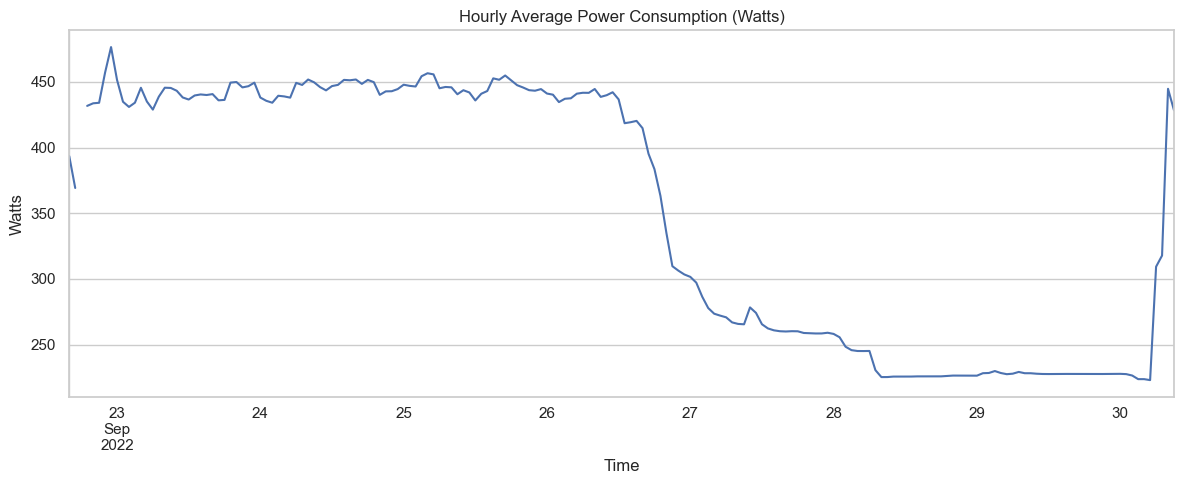

In [12]:
# Step 11: Plot average power consumption over time (resampled hourly)
df.set_index('timestamp').resample('1H')['watts'].mean().plot(figsize=(12, 5))
plt.title("Hourly Average Power Consumption (Watts)")
plt.xlabel("Time")
plt.ylabel("Watts")
plt.tight_layout()
plt.show()

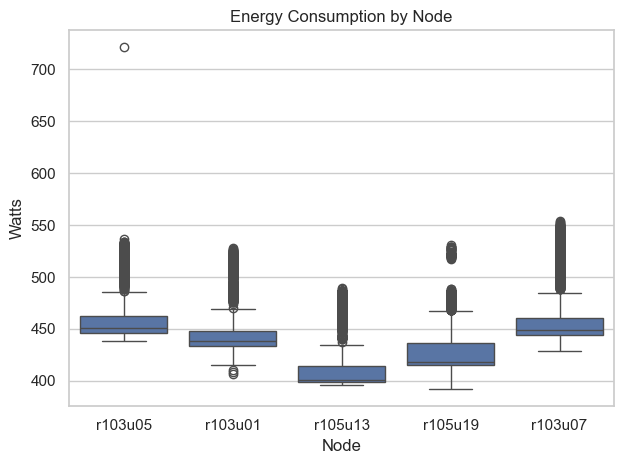

In [13]:
# Step 12: Boxplot for different nodes
top_nodes = df['node'].value_counts().head(5).index
sns.boxplot(x='node', y='watts', data=df[df['node'].isin(top_nodes)])
plt.title("Energy Consumption by Node")
plt.xlabel("Node")
plt.ylabel("Watts")
plt.tight_layout()
plt.show()